In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


df_makers=pd.read_csv('electric_vehicle_sales_by_makers.csv')
df_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [2]:
df_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [3]:
#check for null values
df_makers.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [4]:
#changing date object to date format
df_makers['date']=pd.to_datetime(df_makers['date'],format='%d-%b-%y')

In [5]:
df_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 25.6+ KB


In [6]:
df_state=pd.read_csv('electric_vehicle_sales_by_state.csv')
df_state.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [7]:
#check for null values
df_state.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [8]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [9]:
#changing date object to date format
df_state['date']=pd.to_datetime(df_state['date'],format='%d-%b-%y')

In [10]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    2445 non-null   datetime64[ns]
 1   state                   2445 non-null   object        
 2   vehicle_category        2445 non-null   object        
 3   electric_vehicles_sold  2445 non-null   int64         
 4   total_vehicles_sold     2445 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 95.6+ KB


In [11]:
df_date=pd.read_csv('dim_date.csv')
df_date.head()


,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [12]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [13]:
#changing date object to date format
df_date['date']=pd.to_datetime(df_date['date'],format='%d-%b-%y')

In [14]:
#merging dates data with makers data
new_m=pd.merge(df_date,df_makers,on='date',how='inner')
new_m

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [15]:
#merging dates data with state data
new_s=pd.merge(df_date,df_state,on='date',how='inner')
new_s

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,2021-04-01,2022,Q1,Sikkim,2-Wheelers,0,398
1,2021-04-01,2022,Q1,Sikkim,4-Wheelers,0,361
2,2021-04-01,2022,Q1,Andaman & Nicobar Island,2-Wheelers,0,515
3,2021-04-01,2022,Q1,Arunachal Pradesh,2-Wheelers,0,1256
4,2021-04-01,2022,Q1,Arunachal Pradesh,4-Wheelers,0,724
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [16]:
#checking for duplicates
dup_rows=new_m[new_m.duplicated()]
dup_rows

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold


In [17]:
#checking for duplicates
dup_rows=new_s[new_s.duplicated()]
dup_rows

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold


In [18]:
# Basic statistical Analysis
new_m.describe()

,date,fiscal_year,electric_vehicles_sold
count,816,816.000000,816.000000
mean,2022-09-21 03:30:00,2023.014706,2531.998775
min,2021-04-01 00:00:00,2022.000000,0.000000
25%,2022-01-01 00:00:00,2022.000000,42.000000
50%,2022-10-01 00:00:00,2023.000000,662.000000
75%,2023-07-01 00:00:00,2024.000000,2636.500000
max,2024-03-01 00:00:00,2024.000000,44630.000000
std,NaN,0.813855,4771.077333


In [19]:
# Basic statistical Analysis
new_s.describe()

,date,fiscal_year,electric_vehicles_sold,total_vehicles_sold
count,2445,2445.000000,2445.000000,2445.000000
mean,2022-09-15 12:50:56.687116800,2022.999591,845.035174,23402.966053
min,2021-04-01 00:00:00,2022.000000,0.000000,1.000000
25%,2022-01-01 00:00:00,2022.000000,2.000000,1158.000000
50%,2022-09-01 00:00:00,2023.000000,54.000000,6098.000000
75%,2023-06-01 00:00:00,2024.000000,534.000000,29396.000000
max,2024-03-01 00:00:00,2024.000000,26668.000000,387983.000000
std,NaN,0.816413,2185.167744,38353.266389


In [20]:
#KPI
Total_EV=sum(new_m['electric_vehicles_sold'])
Total_EV

2066111

In [21]:
#KPI
Total_EV=sum(new_s['electric_vehicles_sold'])
Total_EV

2066111

In [22]:
#KPI
Total_veh=sum(new_s['total_vehicles_sold'])
Total_veh

57220252

# List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in terms of the number of 2-wheelers sold.

In [23]:
maker=new_m.groupby(['maker','vehicle_category','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
maker.head()

,maker,vehicle_category,fiscal_year,electric_vehicles_sold
0,AMPERE,2-Wheelers,2022,25510
1,AMPERE,2-Wheelers,2023,87376
2,AMPERE,2-Wheelers,2024,54388
3,ATHER,2-Wheelers,2022,19976
4,ATHER,2-Wheelers,2023,76921


In [24]:
maker1 = maker[(maker['vehicle_category'] == '2-Wheelers') & (maker['fiscal_year'].isin([2023,2024]))]
maker1

,maker,vehicle_category,fiscal_year,electric_vehicles_sold
1,AMPERE,2-Wheelers,2023,87376
2,AMPERE,2-Wheelers,2024,54388
4,ATHER,2-Wheelers,2023,76921
5,ATHER,2-Wheelers,2024,107552
7,BAJAJ,2-Wheelers,2023,32797
8,BAJAJ,2-Wheelers,2024,105695
9,BATTRE ELECTRIC,2-Wheelers,2024,4841
11,BEING,2-Wheelers,2023,11018
12,BGAUSS,2-Wheelers,2024,15051
20,HERO ELECTRIC,2-Wheelers,2023,88993


In [25]:
maker2=maker1.sort_values(by='electric_vehicles_sold',ascending=False)
maker2

,maker,vehicle_category,fiscal_year,electric_vehicles_sold
47,OLA ELECTRIC,2-Wheelers,2024,322489
61,TVS,2-Wheelers,2024,180743
46,OLA ELECTRIC,2-Wheelers,2023,152583
5,ATHER,2-Wheelers,2024,107552
8,BAJAJ,2-Wheelers,2024,105695
43,OKINAWA,2-Wheelers,2023,96945
20,HERO ELECTRIC,2-Wheelers,2023,88993
1,AMPERE,2-Wheelers,2023,87376
60,TVS,2-Wheelers,2023,82093
50,OTHERS,2-Wheelers,2024,78660


In [163]:
fig=px.bar(maker2,x='maker',y='electric_vehicles_sold',color='fiscal_year',text_auto=True)
fig.show()

In [27]:
maker3=maker2.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
maker3

,maker,electric_vehicles_sold
0,AMPERE,141764
1,ATHER,184473
2,BAJAJ,138492
3,BATTRE ELECTRIC,4841
4,BEING,11018
5,BGAUSS,15051
6,HERO ELECTRIC,100942
7,JITENDRA,8563
8,KINETIC GREEN,9585
9,OKAYA EV,27036


In [28]:
maker4=maker3.sort_values(by='electric_vehicles_sold',ascending=False)
maker4
top3=maker4.head(3)
bottom3=maker4.tail(3)

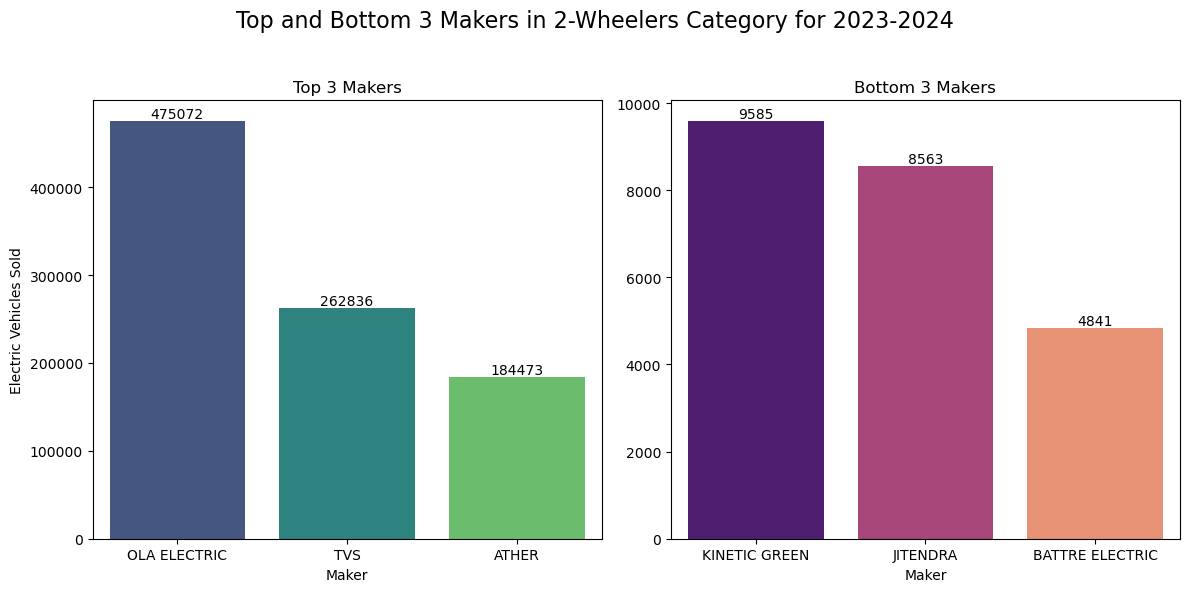

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6)) 

sns.barplot(x='maker', y='electric_vehicles_sold', data=top3, ax=axes[0], palette='viridis')
axes[0].set_title('Top 3 Makers')
axes[0].set_xlabel('Maker')
axes[0].set_ylabel('Electric Vehicles Sold')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')  

sns.barplot(x='maker', y='electric_vehicles_sold', data=bottom3, ax=axes[1], palette='magma')
axes[1].set_title('Bottom 3 Makers')
axes[1].set_xlabel('Maker')
axes[1].set_ylabel('')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.0f')  

fig.suptitle('Top and Bottom 3 Makers in 2-Wheelers Category for 2023-2024', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])


plt.show()


# What are the peak and low season months for EV sales based on the data from 2022 to 2024?

In [30]:
maker_month=new_m.set_index('date')
maker_month=maker_month.groupby([pd.Grouper(freq='M'),'fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
maker_month.head()

,date,fiscal_year,electric_vehicles_sold
0,2021-04-30,2022,6315
1,2021-05-31,2022,1499
2,2021-06-30,2022,5487
3,2021-07-31,2022,15794
4,2021-08-31,2022,17153


In [31]:
fig=px.line(maker_month,x='date',y='electric_vehicles_sold',color='fiscal_year',markers=True,title='Peak and low season months on EV sales from 2022 to 2024')
fig.show()

In FY 2022 may is low season and march is peak season
In FY 2023 may is low season and march is peak season
In FY 2022 June is low season and march is peak season

# Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.

In [32]:
fy24=new_s[(new_s['fiscal_year']==2024)]
fy24

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
1631,2023-04-01,2024,Q1,Sikkim,2-Wheelers,0,465
1632,2023-04-01,2024,Q1,Sikkim,4-Wheelers,0,439
1633,2023-04-01,2024,Q1,Andaman & Nicobar Island,2-Wheelers,0,325
1634,2023-04-01,2024,Q1,Arunachal Pradesh,2-Wheelers,0,971
1635,2023-04-01,2024,Q1,Ladakh,2-Wheelers,0,43
...,...,...,...,...,...,...,...
2440,2024-03-01,2024,Q4,Mizoram,2-Wheelers,58,1932
2441,2024-03-01,2024,Q4,DNH and DD,2-Wheelers,25,780
2442,2024-03-01,2024,Q4,Manipur,2-Wheelers,13,1394
2443,2024-03-01,2024,Q4,Andaman & Nicobar Island,2-Wheelers,2,447


In [33]:
state_group=fy24.groupby('state').sum(['electric_vehicles_sold','total_vehicles_sold']).reset_index()
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,4048,2,660
1,Andaman & Nicobar Island,44528,33,6543
2,Andhra Pradesh,48576,33183,782865
3,Arunachal Pradesh,48576,31,27892
4,Assam,48576,3497,547626
5,Bihar,48576,15069,1132703
6,Chandigarh,48576,2877,45147
7,Chhattisgarh,48576,28540,503068
8,DNH and DD,48576,198,16400
9,Delhi,48576,46724,606348


In [34]:
state_group['PRate']=((state_group['electric_vehicles_sold'])/(state_group['total_vehicles_sold']))*100
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate
0,Andaman & Nicobar,4048,2,660,0.303030
1,Andaman & Nicobar Island,44528,33,6543,0.504356
2,Andhra Pradesh,48576,33183,782865,4.238662
3,Arunachal Pradesh,48576,31,27892,0.111143
4,Assam,48576,3497,547626,0.638575
5,Bihar,48576,15069,1132703,1.330358
6,Chandigarh,48576,2877,45147,6.372516
7,Chhattisgarh,48576,28540,503068,5.673189
8,DNH and DD,48576,198,16400,1.207317
9,Delhi,48576,46724,606348,7.705806


In [35]:
Topstates=state_group.sort_values(by='PRate',ascending=False)
top5=Topstates.head()

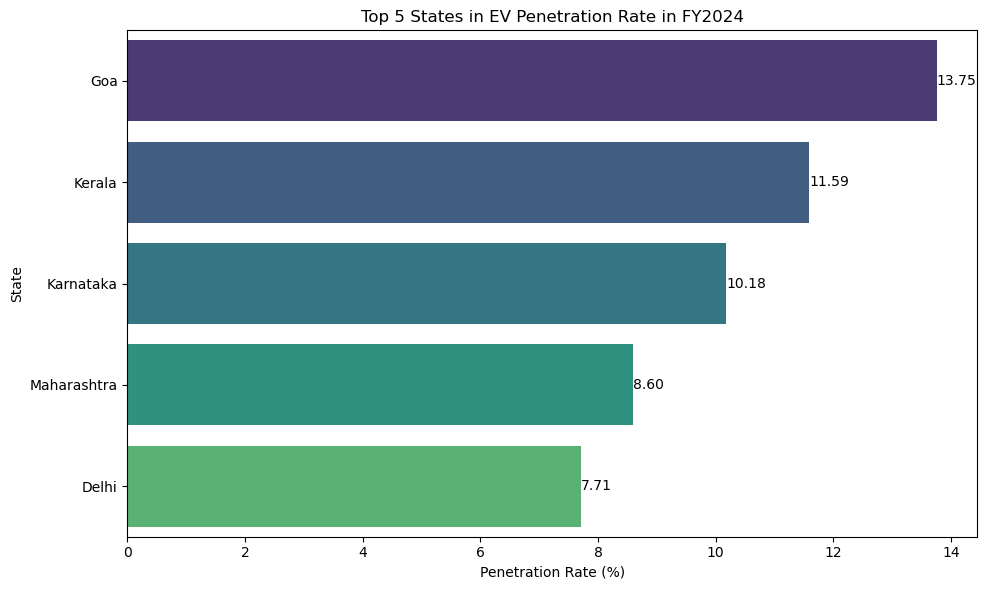

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("viridis") 

fig, ax = plt.subplots(figsize=(10, 6))

bar_plot = sns.barplot(data=top5, 
                       x='PRate', 
                       y='state', 
                       palette=sns.color_palette("viridis"))  

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')  

ax.set_title('Top 5 States in EV Penetration Rate in FY2024')
ax.set_xlabel('Penetration Rate (%)')
ax.set_ylabel('State')

plt.tight_layout()

plt.show()


In [37]:
stateP=new_s.groupby(['state','fiscal_year']).sum(['electric_vehicles_sold','total_vehicles_sold']).reset_index()
stateP

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,2024,2,660
1,Andaman & Nicobar Island,2022,22,5148
2,Andaman & Nicobar Island,2023,23,6534
3,Andaman & Nicobar Island,2024,33,6543
4,Andhra Pradesh,2022,13928,772748
...,...,...,...,...
98,Uttarakhand,2023,6712,216265
99,Uttarakhand,2024,6336,233111
100,West Bengal,2022,2685,860709
101,West Bengal,2023,11011,913558


In [38]:
def PRate(stateP):
    stateP['PRate22'] = stateP.apply(lambda row: ((row['electric_vehicles_sold'] / row['total_vehicles_sold']) * 100) 
                                     if row['fiscal_year'] == 2022 else 0, axis=1)
    
    stateP['PRate23'] = stateP.apply(lambda row: ((row['electric_vehicles_sold'] / row['total_vehicles_sold']) * 100) 
                                     if row['fiscal_year'] == 2023 else 0, axis=1)
    
    stateP['PRate24'] = stateP.apply(lambda row: ((row['electric_vehicles_sold'] / row['total_vehicles_sold']) * 100) 
                                     if row['fiscal_year'] == 2024 else 0, axis=1)
    
    return stateP
statePRate = PRate(stateP)
statePRate

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate22,PRate23,PRate24
0,Andaman & Nicobar,2024,2,660,0.000000,0.000000,0.303030
1,Andaman & Nicobar Island,2022,22,5148,0.427350,0.000000,0.000000
2,Andaman & Nicobar Island,2023,23,6534,0.000000,0.352005,0.000000
3,Andaman & Nicobar Island,2024,33,6543,0.000000,0.000000,0.504356
4,Andhra Pradesh,2022,13928,772748,1.802399,0.000000,0.000000
...,...,...,...,...,...,...,...
98,Uttarakhand,2023,6712,216265,0.000000,3.103600,0.000000
99,Uttarakhand,2024,6336,233111,0.000000,0.000000,2.718018
100,West Bengal,2022,2685,860709,0.311952,0.000000,0.000000
101,West Bengal,2023,11011,913558,0.000000,1.205287,0.000000


In [39]:
statePRate['PRate22'] = statePRate['PRate22'].replace(0, np.nan).dropna()
statePRate['PRate23'] = statePRate['PRate23'].replace(0, np.nan).dropna()
statePRate['PRate24'] = statePRate['PRate24'].replace(0, np.nan).dropna()
statePRate

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate22,PRate23,PRate24
0,Andaman & Nicobar,2024,2,660,NaN,NaN,0.303030
1,Andaman & Nicobar Island,2022,22,5148,0.427350,NaN,NaN
2,Andaman & Nicobar Island,2023,23,6534,NaN,0.352005,NaN
3,Andaman & Nicobar Island,2024,33,6543,NaN,NaN,0.504356
4,Andhra Pradesh,2022,13928,772748,1.802399,NaN,NaN
...,...,...,...,...,...,...,...
98,Uttarakhand,2023,6712,216265,NaN,3.103600,NaN
99,Uttarakhand,2024,6336,233111,NaN,NaN,2.718018
100,West Bengal,2022,2685,860709,0.311952,NaN,NaN
101,West Bengal,2023,11011,913558,NaN,1.205287,NaN


In [40]:
state_group = new_s.groupby(['state', 'fiscal_year']).agg(
    electric_vehicles_sold=('electric_vehicles_sold', 'sum'),
    total_vehicles_sold=('total_vehicles_sold', 'sum')
).reset_index()
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,2024,2,660
1,Andaman & Nicobar Island,2022,22,5148
2,Andaman & Nicobar Island,2023,23,6534
3,Andaman & Nicobar Island,2024,33,6543
4,Andhra Pradesh,2022,13928,772748
...,...,...,...,...
98,Uttarakhand,2023,6712,216265
99,Uttarakhand,2024,6336,233111
100,West Bengal,2022,2685,860709
101,West Bengal,2023,11011,913558


In [41]:
state_group['PRate'] = (state_group['electric_vehicles_sold'] / state_group['total_vehicles_sold']) * 100
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate
0,Andaman & Nicobar,2024,2,660,0.303030
1,Andaman & Nicobar Island,2022,22,5148,0.427350
2,Andaman & Nicobar Island,2023,23,6534,0.352005
3,Andaman & Nicobar Island,2024,33,6543,0.504356
4,Andhra Pradesh,2022,13928,772748,1.802399
...,...,...,...,...,...
98,Uttarakhand,2023,6712,216265,3.103600
99,Uttarakhand,2024,6336,233111,2.718018
100,West Bengal,2022,2685,860709,0.311952
101,West Bengal,2023,11011,913558,1.205287


In [42]:
penetration_rate = state_group.pivot(index='state', columns='fiscal_year', values='PRate').reset_index()
penetration_rate

fiscal_year,state,2022,2023,2024
0,Andaman & Nicobar,NaN,NaN,0.303030
1,Andaman & Nicobar Island,0.427350,0.352005,0.504356
2,Andhra Pradesh,1.802399,4.162124,4.238662
3,Arunachal Pradesh,0.000000,0.008430,0.111143
4,Assam,0.192384,0.460106,0.638575
5,Bihar,0.540838,1.087313,1.330358
6,Chandigarh,1.112194,4.102871,6.372516
7,Chhattisgarh,1.161754,4.693773,5.673189
8,DNH and DD,0.281962,0.836533,1.207317
9,Delhi,4.117896,7.588175,7.705806


In [43]:
penetration_rate.rename(columns={2022: 'PRate22', 2023: 'PRate23', 2024: 'PRate24'}, inplace=True)
penetration_rate

fiscal_year,state,PRate22,PRate23,PRate24
0,Andaman & Nicobar,NaN,NaN,0.303030
1,Andaman & Nicobar Island,0.427350,0.352005,0.504356
2,Andhra Pradesh,1.802399,4.162124,4.238662
3,Arunachal Pradesh,0.000000,0.008430,0.111143
4,Assam,0.192384,0.460106,0.638575
5,Bihar,0.540838,1.087313,1.330358
6,Chandigarh,1.112194,4.102871,6.372516
7,Chhattisgarh,1.161754,4.693773,5.673189
8,DNH and DD,0.281962,0.836533,1.207317
9,Delhi,4.117896,7.588175,7.705806


In [44]:
penetration_rate['PRate22']=pd.to_numeric(penetration_rate['PRate22'],errors='coerce')
penetration_rate['PRate23']=pd.to_numeric(penetration_rate['PRate23'],errors='coerce')
penetration_rate['PRate24']=pd.to_numeric(penetration_rate['PRate24'],errors='coerce')
penetration_rate

fiscal_year,state,PRate22,PRate23,PRate24
0,Andaman & Nicobar,NaN,NaN,0.303030
1,Andaman & Nicobar Island,0.427350,0.352005,0.504356
2,Andhra Pradesh,1.802399,4.162124,4.238662
3,Arunachal Pradesh,0.000000,0.008430,0.111143
4,Assam,0.192384,0.460106,0.638575
5,Bihar,0.540838,1.087313,1.330358
6,Chandigarh,1.112194,4.102871,6.372516
7,Chhattisgarh,1.161754,4.693773,5.673189
8,DNH and DD,0.281962,0.836533,1.207317
9,Delhi,4.117896,7.588175,7.705806


In [45]:
penetration_rate['22_23'] = penetration_rate['PRate23'] - penetration_rate['PRate22']
penetration_rate['23_24'] = penetration_rate['PRate24'] - penetration_rate['PRate23']
penetration_rate

fiscal_year,state,PRate22,PRate23,PRate24,22_23,23_24
0,Andaman & Nicobar,NaN,NaN,0.303030,NaN,NaN
1,Andaman & Nicobar Island,0.427350,0.352005,0.504356,-0.075346,0.152351
2,Andhra Pradesh,1.802399,4.162124,4.238662,2.359725,0.076538
3,Arunachal Pradesh,0.000000,0.008430,0.111143,0.008430,0.102713
4,Assam,0.192384,0.460106,0.638575,0.267722,0.178469
5,Bihar,0.540838,1.087313,1.330358,0.546474,0.243045
6,Chandigarh,1.112194,4.102871,6.372516,2.990677,2.269646
7,Chhattisgarh,1.161754,4.693773,5.673189,3.532019,0.979417
8,DNH and DD,0.281962,0.836533,1.207317,0.554571,0.370784
9,Delhi,4.117896,7.588175,7.705806,3.470279,0.117631


In [46]:
neg_prate=penetration_rate[['state','22_23','23_24']]
neg_sort=neg_prate.sort_values(by=(['22_23','23_24']),ascending=True)
neg_sort

fiscal_year,state,22_23,23_24
1,Andaman & Nicobar Island,-0.075346,0.152351
29,Sikkim,0.000000,0.000000
3,Arunachal Pradesh,0.008430,0.102713
24,Nagaland,0.013245,0.032002
22,Meghalaya,0.109519,0.235567
18,Ladakh,0.158677,0.396030
21,Manipur,0.227029,0.387740
23,Mizoram,0.265892,0.736952
4,Assam,0.267722,0.178469
31,Tripura,0.486309,0.093999


In [47]:
import plotly.graph_objects as go 
neg_melt=neg_prate.melt(id_vars='state',value_vars=['22_23','23_24'],var_name='Fiscal_year',value_name='Penetration Rate')
neg_melt



,state,Fiscal_year,Penetration Rate
0,Andaman & Nicobar,22_23,NaN
1,Andaman & Nicobar Island,22_23,-0.075346
2,Andhra Pradesh,22_23,2.359725
3,Arunachal Pradesh,22_23,0.008430
4,Assam,22_23,0.267722
...,...,...,...
65,Tamil Nadu,23_24,1.161861
66,Tripura,23_24,0.093999
67,Uttar Pradesh,23_24,0.960472
68,Uttarakhand,23_24,-0.385581


In [187]:
fig = px.bar(neg_melt,x='state',y='Penetration Rate',color='Fiscal_year',barmode='group',labels={'Penetration Rate': 'Penetration Rate (%)'},
             height=700,width=1000,
             text_auto=True,title="Penetration Rate by State for Fiscal Years 2022-23 and 2023-24")

fig.show()


In [49]:
maker_4=new_m[(new_m['vehicle_category']=='4-Wheelers')]
maker_4.head(10)

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
5,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
6,2021-04-01,2022,Q1,4-Wheelers,Tata Motors,322
7,2021-04-01,2022,Q1,4-Wheelers,MG Motor,118
8,2021-04-01,2022,Q1,4-Wheelers,Mahindra & Mahindra,171
9,2021-04-01,2022,Q1,4-Wheelers,Hyundai Motor,12
10,2021-04-01,2022,Q1,4-Wheelers,Mercedes -Benz AG,3


In [50]:
maker_q=maker_4.groupby(['maker','fiscal_year','quarter']).sum('electric_vehicles_sold').reset_index()
maker_q

,maker,fiscal_year,quarter,electric_vehicles_sold
0,BMW India,2022,Q1,0
1,BMW India,2022,Q2,0
2,BMW India,2022,Q3,0
3,BMW India,2022,Q4,7
4,BMW India,2023,Q1,22
...,...,...,...,...
115,Volvo Auto India,2023,Q4,84
116,Volvo Auto India,2024,Q1,94
117,Volvo Auto India,2024,Q2,104
118,Volvo Auto India,2024,Q3,145


In [51]:
top_m=maker_4.groupby('maker').sum('electric_vehicles_sold').reset_index()
top_m

,maker,fiscal_year,electric_vehicles_sold
0,BMW India,72828,1370
1,BYD India,72828,2419
2,Hyundai Motor,72828,2076
3,KIA Motors,72828,557
4,MG Motor,72828,13753
5,Mahindra & Mahindra,72828,41193
6,Mercedes -Benz AG,72828,388
7,PCA Automobiles,72828,1684
8,Tata Motors,72828,88935
9,Volvo Auto India,72828,568


In [52]:
top_sort=top_m.sort_values(by='electric_vehicles_sold',ascending=False)
top_s=top_sort.head()
top_s

,maker,fiscal_year,electric_vehicles_sold
8,Tata Motors,72828,88935
5,Mahindra & Mahindra,72828,41193
4,MG Motor,72828,13753
1,BYD India,72828,2419
2,Hyundai Motor,72828,2076


In [53]:
top5_q=maker_q[maker_q['maker'].isin(top_s['maker'])]
top5_q

,maker,fiscal_year,quarter,electric_vehicles_sold
12,BYD India,2022,Q1,0
13,BYD India,2022,Q2,0
14,BYD India,2022,Q3,1
15,BYD India,2022,Q4,32
16,BYD India,2023,Q1,81
17,BYD India,2023,Q2,113
18,BYD India,2023,Q3,103
19,BYD India,2023,Q4,623
20,BYD India,2024,Q1,406
21,BYD India,2024,Q2,310


In [55]:
fig = px.line(top5_q, x='quarter', y='electric_vehicles_sold', color='maker', line_group='maker',markers=True,
              facet_col='fiscal_year', title='Quarterly Sales Trends for Top 5 EV Makers (4-wheelers) from 2022 to 2024')
fig.show() 

In [56]:
dk=new_s[(new_s['state'].isin(['Delhi','Karnataka']))& (new_s['fiscal_year']==2024)]
dk

,date,fiscal_year,quarter,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
1650,2023-04-01,2024,Q1,Delhi,4-Wheelers,551,14861
1657,2023-04-01,2024,Q1,Karnataka,4-Wheelers,762,22368
1676,2023-04-01,2024,Q1,Delhi,2-Wheelers,2738,28590
1683,2023-04-01,2024,Q1,Karnataka,2-Wheelers,9711,91491
1715,2023-05-01,2024,Q1,Delhi,4-Wheelers,787,16609
1722,2023-05-01,2024,Q1,Karnataka,4-Wheelers,999,22601
1743,2023-05-01,2024,Q1,Delhi,2-Wheelers,4977,32282
1750,2023-05-01,2024,Q1,Karnataka,2-Wheelers,17292,97074
1785,2023-06-01,2024,Q1,Delhi,4-Wheelers,935,15723
1792,2023-06-01,2024,Q1,Karnataka,4-Wheelers,1142,24603


In [57]:
dkPRate=dk.groupby('state').sum(['electric_vehicles_sold','total_vehicles_sold']).reset_index()
dkPRate

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Delhi,48576,46724,606348
1,Karnataka,48576,160989,1581988


In [58]:
dkPRate['PRate24']=(dkPRate['electric_vehicles_sold']/dkPRate['total_vehicles_sold'])*100
dkPRate

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate24
0,Delhi,48576,46724,606348,7.705806
1,Karnataka,48576,160989,1581988,10.176373


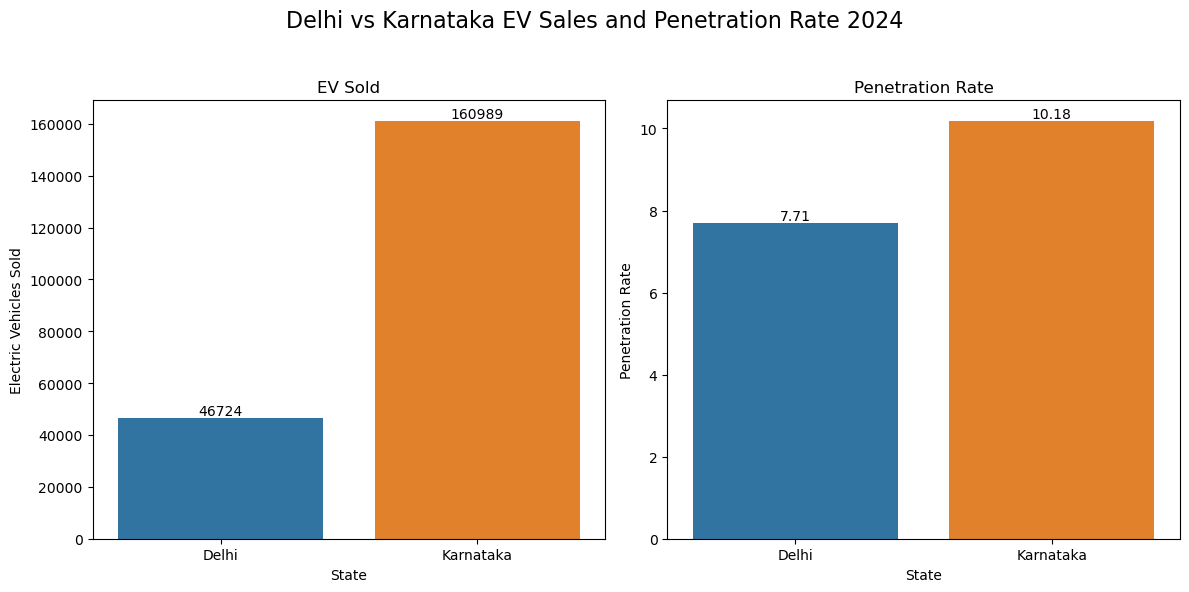

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  


sns.barplot(x='state', y='electric_vehicles_sold', data=dkPRate, ax=axes[0])
axes[0].set_title('EV Sold')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Electric Vehicles Sold')

for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.0f')  


sns.barplot(x='state', y='PRate24', data=dkPRate, ax=axes[1])
axes[1].set_title('Penetration Rate')
axes[1].set_xlabel('State')
axes[1].set_ylabel('Penetration Rate')

for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f') 


fig.suptitle("Delhi vs Karnataka EV Sales and Penetration Rate 2024", fontsize=16)


fig.tight_layout(rect=[0, 0, 1, 0.95]) 

plt.show()

In [61]:
maker_4=new_m[(new_m['vehicle_category']=='4-Wheelers')]
maker_4

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
5,2021-04-01,2022,Q1,4-Wheelers,KIA Motors,0
...,...,...,...,...,...,...
798,2024-03-01,2024,Q4,4-Wheelers,PCA Automobiles,130
799,2024-03-01,2024,Q4,4-Wheelers,BMW India,55
800,2024-03-01,2024,Q4,4-Wheelers,Mercedes -Benz AG,31
801,2024-03-01,2024,Q4,4-Wheelers,Volvo Auto India,39


In [62]:
maker_sales=maker_4.groupby('maker').sum('electric_vehicles_sold').reset_index()
maker_sales

,maker,fiscal_year,electric_vehicles_sold
0,BMW India,72828,1370
1,BYD India,72828,2419
2,Hyundai Motor,72828,2076
3,KIA Motors,72828,557
4,MG Motor,72828,13753
5,Mahindra & Mahindra,72828,41193
6,Mercedes -Benz AG,72828,388
7,PCA Automobiles,72828,1684
8,Tata Motors,72828,88935
9,Volvo Auto India,72828,568


In [63]:
maker_sort=maker_sales.sort_values(by='electric_vehicles_sold',ascending=False)
maker_top5=maker_sort.head()
maker_top5

,maker,fiscal_year,electric_vehicles_sold
8,Tata Motors,72828,88935
5,Mahindra & Mahindra,72828,41193
4,MG Motor,72828,13753
1,BYD India,72828,2419
2,Hyundai Motor,72828,2076


In [64]:
maker_s=maker_4.groupby(['maker','fiscal_year']).sum('electric_vehicles_sold').reset_index()
maker_s

,maker,fiscal_year,electric_vehicles_sold
0,BMW India,2022,7
1,BMW India,2023,285
2,BMW India,2024,1078
3,BYD India,2022,33
4,BYD India,2023,920
5,BYD India,2024,1466
6,Hyundai Motor,2022,110
7,Hyundai Motor,2023,576
8,Hyundai Motor,2024,1390
9,KIA Motors,2022,0


In [65]:
maker_pivot=pd.pivot_table(maker_s,index='maker',columns='fiscal_year',values='electric_vehicles_sold').reset_index()
maker_pivot

fiscal_year,maker,2022,2023,2024
0,BMW India,7,285,1078
1,BYD India,33,920,1466
2,Hyundai Motor,110,576,1390
3,KIA Motors,0,229,328
4,MG Motor,1647,3277,8829
5,Mahindra & Mahindra,4042,13805,23346
6,Mercedes -Benz AG,26,71,291
7,PCA Automobiles,0,151,1533
8,Tata Motors,12708,28046,48181
9,Volvo Auto India,4,105,459


In [66]:
maker_pivot.rename(columns={2022:'EV_sold22',2023:'EV_sold23',2024:'EV_sold24'},inplace=True)
maker_pivot

fiscal_year,maker,EV_sold22,EV_sold23,EV_sold24
0,BMW India,7,285,1078
1,BYD India,33,920,1466
2,Hyundai Motor,110,576,1390
3,KIA Motors,0,229,328
4,MG Motor,1647,3277,8829
5,Mahindra & Mahindra,4042,13805,23346
6,Mercedes -Benz AG,26,71,291
7,PCA Automobiles,0,151,1533
8,Tata Motors,12708,28046,48181
9,Volvo Auto India,4,105,459


In [67]:
start_year=2022
end_year=2024
maker_pivot['CAGR']=(((maker_pivot['EV_sold24']/maker_pivot['EV_sold22'])**(1/(end_year-start_year)))-1)*100
maker_pivot

fiscal_year,maker,EV_sold22,EV_sold23,EV_sold24,CAGR
0,BMW India,7,285,1078,1140.967365
1,BYD India,33,920,1466,566.515134
2,Hyundai Motor,110,576,1390,255.476633
3,KIA Motors,0,229,328,inf
4,MG Motor,1647,3277,8829,131.530899
5,Mahindra & Mahindra,4042,13805,23346,140.330055
6,Mercedes -Benz AG,26,71,291,234.549065
7,PCA Automobiles,0,151,1533,inf
8,Tata Motors,12708,28046,48181,94.714952
9,Volvo Auto India,4,105,459,971.214264


In [68]:
top5_cagr=maker_pivot[maker_pivot['maker'].isin(maker_top5['maker'])]
top5_cagr

fiscal_year,maker,EV_sold22,EV_sold23,EV_sold24,CAGR
1,BYD India,33,920,1466,566.515134
2,Hyundai Motor,110,576,1390,255.476633
4,MG Motor,1647,3277,8829,131.530899
5,Mahindra & Mahindra,4042,13805,23346,140.330055
8,Tata Motors,12708,28046,48181,94.714952


In [69]:
import plotly.express as px

fig = px.bar(top5_cagr, x='CAGR', y='maker', 
             title='CAGR (2022-2024) for Top 5 4-Wheeler EV Makers',
             labels={'CAGR_2022_2024': 'CAGR (%)', 'maker': 'Maker'},
             text_auto=True,color='maker')

fig.show()


In [70]:
state_totalv=new_s.groupby(['state','fiscal_year']).sum('total_vehicles_sold').reset_index()
state_totalv

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,2024,2,660
1,Andaman & Nicobar Island,2022,22,5148
2,Andaman & Nicobar Island,2023,23,6534
3,Andaman & Nicobar Island,2024,33,6543
4,Andhra Pradesh,2022,13928,772748
...,...,...,...,...
98,Uttarakhand,2023,6712,216265
99,Uttarakhand,2024,6336,233111
100,West Bengal,2022,2685,860709
101,West Bengal,2023,11011,913558


In [71]:
state_pivot=pd.pivot_table(state_totalv,index='state',columns='fiscal_year',values='total_vehicles_sold').reset_index()
state_pivot

fiscal_year,state,2022,2023,2024
0,Andaman & Nicobar,NaN,NaN,660.0
1,Andaman & Nicobar Island,5148.0,6534.0,6543.0
2,Andhra Pradesh,772748.0,728258.0,782865.0
3,Arunachal Pradesh,19929.0,23726.0,27892.0
4,Assam,379450.0,476195.0,547626.0
5,Bihar,892873.0,1022797.0,1132703.0
6,Chandigarh,36954.0,48527.0,45147.0
7,Chhattisgarh,390272.0,441649.0,503068.0
8,DNH and DD,12413.0,14584.0,16400.0
9,Delhi,401540.0,580548.0,606348.0


In [72]:
state_pivot.rename(columns={2022:'total_sold22',2023:'total_sold23',2024:'total_sold24'},inplace=True)
state_pivot

start_year=2022
end_year=2024
state_pivot['CAGR']=(((state_pivot['total_sold24']/state_pivot['total_sold22'])**(1/(end_year-start_year)))-1)*100
state_pivot

fiscal_year,state,total_sold22,total_sold23,total_sold24,CAGR
0,Andaman & Nicobar,NaN,NaN,660.0,NaN
1,Andaman & Nicobar Island,5148.0,6534.0,6543.0,12.737705
2,Andhra Pradesh,772748.0,728258.0,782865.0,0.652483
3,Arunachal Pradesh,19929.0,23726.0,27892.0,18.303359
4,Assam,379450.0,476195.0,547626.0,20.133672
5,Bihar,892873.0,1022797.0,1132703.0,12.632359
6,Chandigarh,36954.0,48527.0,45147.0,10.530904
7,Chhattisgarh,390272.0,441649.0,503068.0,13.534970
8,DNH and DD,12413.0,14584.0,16400.0,14.943270
9,Delhi,401540.0,580548.0,606348.0,22.884347


In [73]:
state_sort=state_pivot.sort_values(by='CAGR',ascending=False)
state_top10=state_sort.head(10)
state_top10

fiscal_year,state,total_sold22,total_sold23,total_sold24,CAGR
22,Meghalaya,22193.0,31362.0,36628.0,28.469075
10,Goa,48372.0,73074.0,78524.0,27.410196
16,Karnataka,1007894.0,1404447.0,1581988.0,25.283582
9,Delhi,401540.0,580548.0,606348.0,22.884347
28,Rajasthan,880985.0,1126130.0,1300476.0,21.497380
11,Gujarat,1094872.0,1439692.0,1590987.0,20.545677
4,Assam,379450.0,476195.0,547626.0,20.133672
23,Mizoram,19439.0,24446.0,27422.0,18.771599
3,Arunachal Pradesh,19929.0,23726.0,27892.0,18.303359
12,Haryana,528591.0,642148.0,732029.0,17.680434


In [74]:
fig=px.bar(state_top10,x='state',y='CAGR',text_auto=True,title='Top 10 states CAGR % (2022-2024) in Total vehicles sales',color='state')
fig.show()

In [75]:
state_group=new_s.groupby('state').sum('electric_vehicles_sold').reset_index()
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,4048,2,660
1,Andaman & Nicobar Island,139586,78,18225
2,Andhra Pradesh,145656,77422,2283871
3,Arunachal Pradesh,145656,33,71547
4,Assam,145656,6418,1403271
5,Bihar,145656,31019,3048373
6,Chandigarh,145656,5279,130628
7,Chhattisgarh,145656,53804,1334989
8,DNH and DD,145656,355,43397
9,Delhi,145656,107312,1588436


state_pivot=pd.pivot_table(state_group,index='state',columns='fiscal_year',values=['electric_vehicles_sold','total_vehicles_sold']).reset_index()
state_pivot

In [76]:
state_group['PRate']=((state_group['electric_vehicles_sold'])/(state_group['total_vehicles_sold']))*100
state_group

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate
0,Andaman & Nicobar,4048,2,660,0.303030
1,Andaman & Nicobar Island,139586,78,18225,0.427984
2,Andhra Pradesh,145656,77422,2283871,3.389946
3,Arunachal Pradesh,145656,33,71547,0.046124
4,Assam,145656,6418,1403271,0.457360
5,Bihar,145656,31019,3048373,1.017559
6,Chandigarh,145656,5279,130628,4.041247
7,Chhattisgarh,145656,53804,1334989,4.030295
8,DNH and DD,145656,355,43397,0.818029
9,Delhi,145656,107312,1588436,6.755828


In [77]:
state_sort=state_group.sort_values(by='PRate',ascending=False)
state_top10=state_sort.head(10)
state_top10

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold,PRate
10,Goa,145656,19684,199970,9.843477
16,Karnataka,145656,312995,3994329,7.835984
9,Delhi,145656,107312,1588436,6.755828
17,Kerala,145656,137060,2064677,6.638326
20,Maharashtra,145656,396045,6101429,6.491020
25,Odisha,141608,78267,1688794,4.634491
28,Rajasthan,145656,150366,3307591,4.546088
11,Gujarat,145656,181389,4125551,4.396722
30,Tamil Nadu,145656,200062,4652363,4.300223
6,Chandigarh,145656,5279,130628,4.041247


In [78]:
state_cag=new_s.groupby(['state','fiscal_year']).sum('electric_vehicles_sold').reset_index()
state_cag

,state,fiscal_year,electric_vehicles_sold,total_vehicles_sold
0,Andaman & Nicobar,2024,2,660
1,Andaman & Nicobar Island,2022,22,5148
2,Andaman & Nicobar Island,2023,23,6534
3,Andaman & Nicobar Island,2024,33,6543
4,Andhra Pradesh,2022,13928,772748
...,...,...,...,...
98,Uttarakhand,2023,6712,216265
99,Uttarakhand,2024,6336,233111
100,West Bengal,2022,2685,860709
101,West Bengal,2023,11011,913558


In [79]:
state_cpivot=pd.pivot_table(state_cag,index='state',columns='fiscal_year',values='electric_vehicles_sold').reset_index()
state_cpivot

fiscal_year,state,2022,2023,2024
0,Andaman & Nicobar,NaN,NaN,2.0
1,Andaman & Nicobar Island,22.0,23.0,33.0
2,Andhra Pradesh,13928.0,30311.0,33183.0
3,Arunachal Pradesh,0.0,2.0,31.0
4,Assam,730.0,2191.0,3497.0
5,Bihar,4829.0,11121.0,15069.0
6,Chandigarh,411.0,1991.0,2877.0
7,Chhattisgarh,4534.0,20730.0,28540.0
8,DNH and DD,35.0,122.0,198.0
9,Delhi,16535.0,44053.0,46724.0


In [80]:
state_cpivot.rename(columns={2022:'EV_sold22',2023:'EV_sold23',2024:'EV_sold24'},inplace=True)
state_cpivot

fiscal_year,state,EV_sold22,EV_sold23,EV_sold24
0,Andaman & Nicobar,NaN,NaN,2.0
1,Andaman & Nicobar Island,22.0,23.0,33.0
2,Andhra Pradesh,13928.0,30311.0,33183.0
3,Arunachal Pradesh,0.0,2.0,31.0
4,Assam,730.0,2191.0,3497.0
5,Bihar,4829.0,11121.0,15069.0
6,Chandigarh,411.0,1991.0,2877.0
7,Chhattisgarh,4534.0,20730.0,28540.0
8,DNH and DD,35.0,122.0,198.0
9,Delhi,16535.0,44053.0,46724.0


In [81]:
start_year=2022
end_year=2024
state_cpivot['CAGR']=(((state_cpivot['EV_sold24']/state_cpivot['EV_sold22'])**(1/(end_year-start_year)))-1)*100
state_cpivot

fiscal_year,state,EV_sold22,EV_sold23,EV_sold24,CAGR
0,Andaman & Nicobar,NaN,NaN,2.0,NaN
1,Andaman & Nicobar Island,22.0,23.0,33.0,22.474487
2,Andhra Pradesh,13928.0,30311.0,33183.0,54.352421
3,Arunachal Pradesh,0.0,2.0,31.0,inf
4,Assam,730.0,2191.0,3497.0,118.870075
5,Bihar,4829.0,11121.0,15069.0,76.649989
6,Chandigarh,411.0,1991.0,2877.0,164.575131
7,Chhattisgarh,4534.0,20730.0,28540.0,150.891661
8,DNH and DD,35.0,122.0,198.0,137.847490
9,Delhi,16535.0,44053.0,46724.0,68.100075


In [82]:
state_top10c=state_cpivot[state_cpivot['state'].isin(state_top10['state'])]
state_top10c

fiscal_year,state,EV_sold22,EV_sold23,EV_sold24,CAGR
6,Chandigarh,411.0,1991.0,2877.0,164.575131
9,Delhi,16535.0,44053.0,46724.0,68.100075
10,Goa,1778.0,7107.0,10799.0,146.448337
11,Gujarat,18026.0,79004.0,84359.0,116.329640
16,Karnataka,43111.0,108895.0,160989.0,93.243125
17,Kerala,13639.0,49483.0,73938.0,132.831955
20,Maharashtra,48374.0,150502.0,197169.0,101.889307
25,Odisha,9498.0,29651.0,39118.0,102.942141
28,Rajasthan,20087.0,63835.0,66444.0,81.873885
30,Tamil Nadu,36863.0,68885.0,94314.0,59.953130


In [83]:
projected_years=2030-2024
state_top10c['projected_sales2030']=state_top10c['EV_sold24']*(1+(state_top10c['CAGR']/100))**projected_years
state_top10c['projected_sales2030'] = state_top10c['projected_sales2030'].apply(lambda x: int(round(x)))
state_top10c

fiscal_year,state,EV_sold22,EV_sold23,EV_sold24,CAGR,projected_sales2030
6,Chandigarh,411.0,1991.0,2877.0,164.575131,986811
9,Delhi,16535.0,44053.0,46724.0,68.100075,1054259
10,Goa,1778.0,7107.0,10799.0,146.448337,2419574
11,Gujarat,18026.0,79004.0,84359.0,116.329640,8646246
16,Karnataka,43111.0,108895.0,160989.0,93.243125,8383406
17,Kerala,13639.0,49483.0,73938.0,132.831955,11779401
20,Maharashtra,48374.0,150502.0,197169.0,101.889307,13351146
25,Odisha,9498.0,29651.0,39118.0,102.942141,2732814
28,Rajasthan,20087.0,63835.0,66444.0,81.873885,2404794
30,Tamil Nadu,36863.0,68885.0,94314.0,59.953130,1579547


In [88]:
state_melt=state_top10c.melt(id_vars='state', value_vars=['EV_sold24', 'projected_sales2030'],var_name='year', value_name='Sales')
state_melt

,state,year,Sales
0,Chandigarh,EV_sold24,2877.0
1,Delhi,EV_sold24,46724.0
2,Goa,EV_sold24,10799.0
3,Gujarat,EV_sold24,84359.0
4,Karnataka,EV_sold24,160989.0
5,Kerala,EV_sold24,73938.0
6,Maharashtra,EV_sold24,197169.0
7,Odisha,EV_sold24,39118.0
8,Rajasthan,EV_sold24,66444.0
9,Tamil Nadu,EV_sold24,94314.0


In [96]:
fig=px.bar(state_melt,x='state',y='Sales',text_auto=True,
        title='Top 10 states current sales vs projected sales',color='year',barmode='group')
fig.show()

# Estimate the revenue growth rate of 4-wheeler and 2-wheelers EVs in India for 2022 vs 2024 and 2023 vs 2024,assuming an average unit price.2w 85000 4w 1500000

In [102]:
import numpy as np

new_m['Revenue']=np.where(
new_m['vehicle_category']=='4-Wheelers',new_m['electric_vehicles_sold']*1500000,new_m['electric_vehicles_sold']*85000)
Total_rev_maker=sum(new_m['Revenue'])
Total_rev_maker

392033780000

In [103]:
new_m

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold,Revenue
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0,0
...,...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070,260950000
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625,53125000
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915,332775000
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585,49725000


In [121]:
rev_maker=new_m.groupby(['vehicle_category','fiscal_year']).sum('Revenue').reset_index()
rev_maker

,vehicle_category,fiscal_year,electric_vehicles_sold,Revenue
0,2-Wheelers,2022,252573,21468705000
1,2-Wheelers,2023,727903,61871755000
2,2-Wheelers,2024,932692,79278820000
3,4-Wheelers,2022,18577,27865500000
4,4-Wheelers,2023,47465,71197500000
5,4-Wheelers,2024,86901,130351500000


In [123]:
rev_pivot=pd.pivot_table(rev_maker,index='vehicle_category',columns='fiscal_year',values='Revenue')
rev_pivot.rename(columns={2022: 'rev22', 2023: 'rev23', 2024: 'rev24'}, inplace=True)
#rev_pivot=rev_pivot.fillna(0)
rev_pivot.reset_index()

fiscal_year,vehicle_category,rev22,rev23,rev24
0,2-Wheelers,21468705000,61871755000,79278820000
1,4-Wheelers,27865500000,71197500000,130351500000


In [124]:
rev_pivot['rev22_24']=((rev_pivot['rev24']-rev_pivot['rev22'])/rev_pivot['rev22'])*100
rev_pivot['rev23_24']=((rev_pivot['rev24']-rev_pivot['rev23'])/rev_pivot['rev23'])*100
rev_pivot

fiscal_year,rev22,rev23,rev24,rev22_24,rev23_24
vehicle_category,,,,,
2-Wheelers,21468705000,61871755000,79278820000,269.276209,28.134106
4-Wheelers,27865500000,71197500000,130351500000,367.788125,83.084378


In [127]:
rev_pivot=rev_pivot.reset_index()
rev_melt=rev_pivot.melt(id_vars='vehicle_category',value_vars=['rev22_24','rev23_24'],var_name='year',value_name='Revenue Growth')
rev_melt


,vehicle_category,year,Revenue Growth
0,2-Wheelers,rev22_24,269.276209
1,4-Wheelers,rev22_24,367.788125
2,2-Wheelers,rev23_24,28.134106
3,4-Wheelers,rev23_24,83.084378


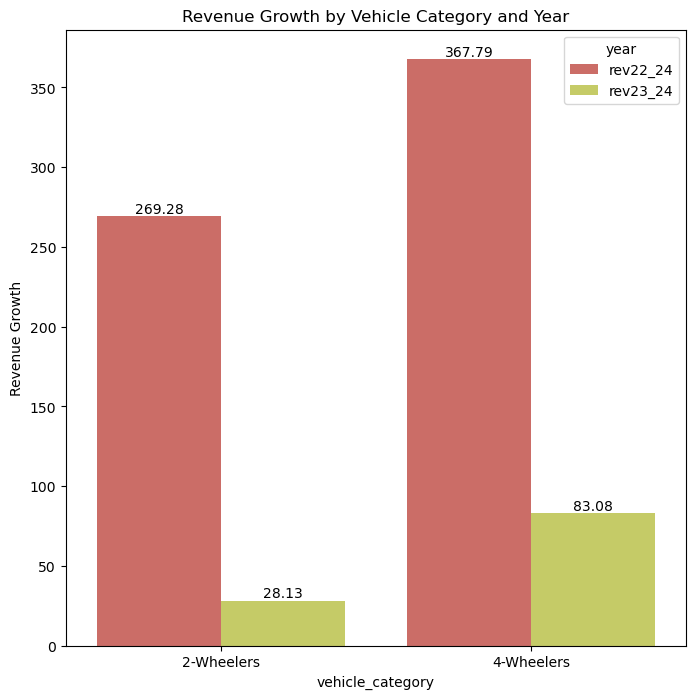

In [134]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(rev_melt,x='vehicle_category',y='Revenue Growth',hue='year',palette=sns.hls_palette())
container=0
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
ax.set_title('Revenue Growth by Vehicle Category and Year')
plt.show() 